<a href="https://colab.research.google.com/github/marsavil/Data_Science_Notebooks/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [29]:
url = 'https://raw.githubusercontent.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/main/prestacar.csv'
import pandas as pd
df = pd.read_csv(url)
df.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [30]:
X = df.drop('moroso', axis=1)
y = df['moroso']

In [70]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [32]:
print(f'La exactitud del modelo es {modelo.score(X, y)}')

La exactitud del modelo es 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [33]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [34]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
print(f'La exactitud del modelo con el conjunto de entrenamiento es {modelo.score(X_train, y_train)}')

La exactitud del modelo con el conjunto de entrenamiento es 1.0


In [36]:
print(f'La exactitud del modelo con el conjunto de validación es {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de validación es 0.8489678599425137


In [37]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(X_train, y_train)

print(f'La exactitud del modelo con el conjunto de entrenamiento es {modelo.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es 0.9206445993031359
La exactitud del modelo con el conjunto de validación es 0.905496036930581


### Evaluando el modelo

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
y_predict = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_predict)
matriz_confusion

array([[10353,   126],
       [  959,    43]])

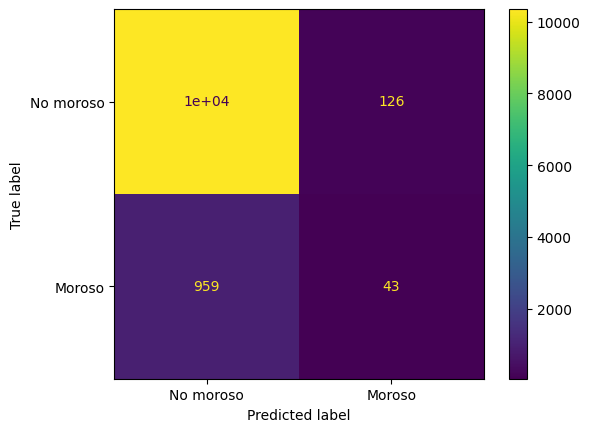

In [40]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=['No moroso', 'Moroso'])
visualizacion.plot();

### Ejercicio


1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.



In [64]:
dataset = pd.read_csv('https://raw.githubusercontent.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/desafios/diabetes.csv')
dataset.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [65]:
X2 = dataset.drop('diabetes', axis=1)
y2 = dataset['diabetes']

2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [66]:
X2, X2_test, y2, y2_test = train_test_split(X2, y2, test_size=0.05, stratify=y2, random_state=5)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, stratify=y2, random_state=5)

3 - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

In [67]:
modelo_dt = DecisionTreeClassifier(max_depth = 3)
modelo_dt.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=3)

In [71]:
from sklearn.ensemble import RandomForestClassifier


modelo_rf = RandomForestClassifier(max_depth = 2)
modelo_rf.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=2)

4 - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

[[52 11]
 [10 21]]


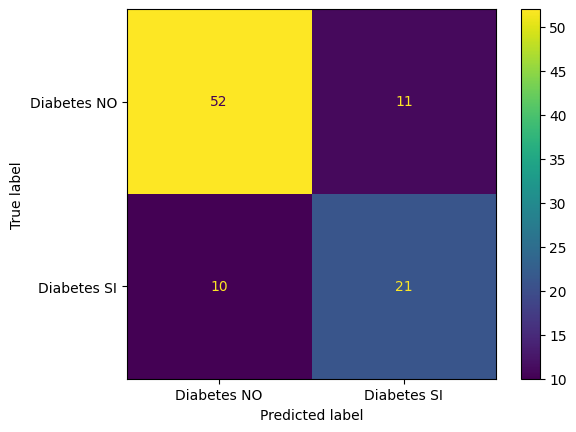

In [74]:
y2_predict = modelo_dt.predict(X2_val)
matriz_confusion_2 = confusion_matrix(y2_val, y2_predict)
print(matriz_confusion_2)
visualizacion_2 = ConfusionMatrixDisplay(matriz_confusion_2, display_labels=['Diabetes NO', 'Diabetes SI'])
visualizacion_2.plot();

[[58  5]
 [24  7]]


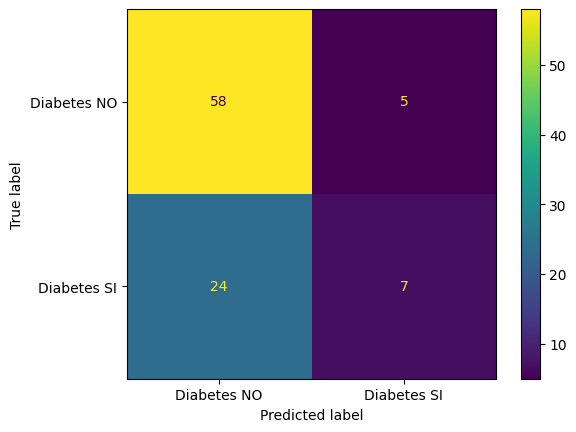

In [75]:
y3_predict = modelo_rf.predict(X2_val)
matriz_confusion_3 = confusion_matrix(y2_val, y3_predict)
print(matriz_confusion_3)
visualizacion_3 = ConfusionMatrixDisplay(matriz_confusion_3, display_labels=['Diabetes NO', 'Diabetes SI'])
visualizacion_3.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [44]:
print(f'La exactitud del modelo es {accuracy_score(y_val, y_predict)}')
print(f'La precisión del modelo es {precision_score(y_val, y_predict)}')
print(f'La sensibilidad del modelo es {recall_score(y_val, y_predict)}')
print(f'El f1 del modelo es {f1_score(y_val, y_predict)}')

La exactitud del modelo es 0.905496036930581
La precisión del modelo es 0.25443786982248523
La sensibilidad del modelo es 0.04291417165668663
El f1 del modelo es 0.07344150298889837


### Curva ROC

In [41]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [47]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

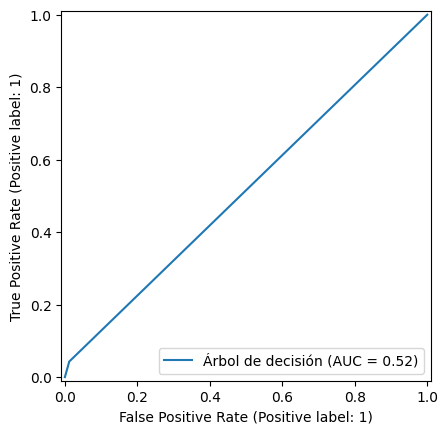

In [51]:
RocCurveDisplay.from_predictions(y_val, y_predict, name ='Árbol de decisión');

In [52]:
print(f'El área bajo la curva ROC del modelo es {roc_auc_score(y_val, y_predict)}')

El área bajo la curva ROC del modelo es 0.5154450617802471


### Curva de  precisión x sensibilidad

In [42]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [53]:
from sklearn.metrics import PrecisionRecallDisplay

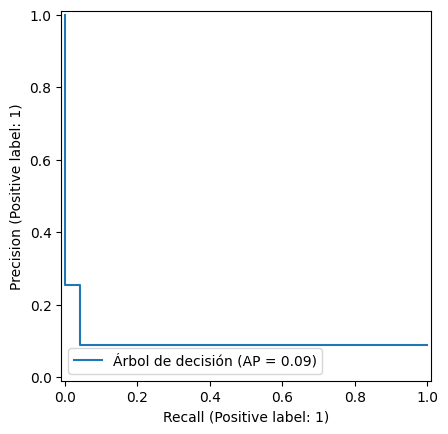

In [54]:
PrecisionRecallDisplay.from_predictions(y_val, y_predict, name ='Árbol de decisión');

In [56]:
from sklearn.metrics import average_precision_score

In [57]:
print(f' El score promedio de precision vs recall es {average_precision_score(y_val,y_predict)} ')

 El score promedio de precision vs recall es 0.09444829971513936 


### Informe de métricas

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



### Ejercicio

1 - Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

In [76]:
print(f'La exactitud del modelo "Decission Tree" es {accuracy_score(y2_val, y2_predict)}')
print(f'La precisión del modelo "Decission Tree" es {precision_score(y2_val, y2_predict)}')
print(f'La sensibilidad del modelo "Decission Tree" es {recall_score(y2_val, y2_predict)}')
print(f'El f1 del modelo "Decission Tree" es {f1_score(y2_val, y2_predict)}')

La exactitud del modelo "Decission Tree" es 0.776595744680851
La precisión del modelo "Decission Tree" es 0.65625
La sensibilidad del modelo "Decission Tree" es 0.6774193548387096
El f1 del modelo "Decission Tree" es 0.6666666666666666


In [78]:
print(f'La exactitud del modelo "Random Forest" es {accuracy_score(y2_val, y3_predict)}')
print(f'La precisión del modelo "Random Forest" es {precision_score(y2_val, y3_predict)}')
print(f'La sensibilidad del modelo "Random Forest" es {recall_score(y2_val, y3_predict)}')
print(f'El f1 del modelo "Random Forest" es {f1_score(y2_val, y3_predict)}')

La exactitud del modelo "Random Forest" es 0.6914893617021277
La precisión del modelo "Random Forest" es 0.5833333333333334
La sensibilidad del modelo "Random Forest" es 0.22580645161290322
El f1 del modelo "Random Forest" es 0.32558139534883723


2 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

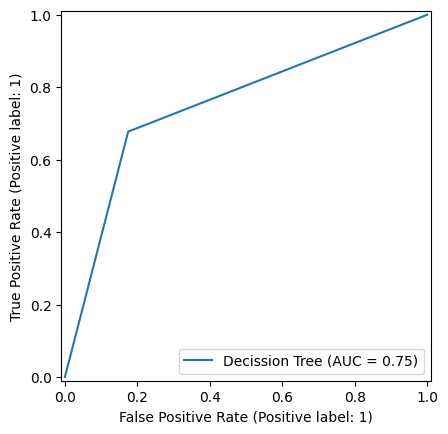

In [79]:
RocCurveDisplay.from_predictions(y2_val, y2_predict, name ='Decission Tree');

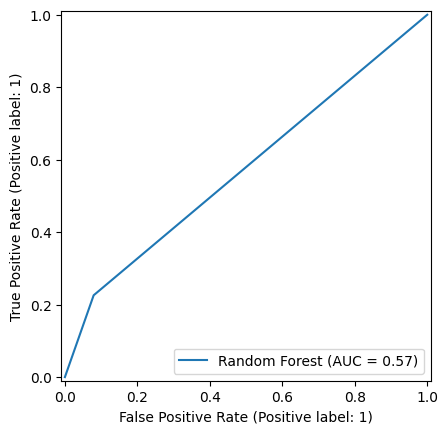

In [81]:
RocCurveDisplay.from_predictions(y2_val, y3_predict, name ='Random Forest');

3 - Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

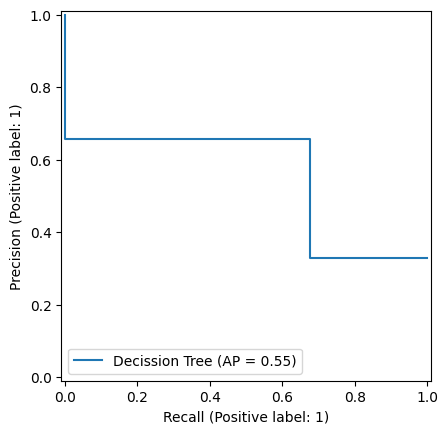

In [80]:
PrecisionRecallDisplay.from_predictions(y2_val, y2_predict, name ='Decission Tree');

In [83]:
print(f' El score promedio de precision vs recall es {average_precision_score(y2_val,y2_predict)} ')

 El score promedio de precision vs recall es 0.5509394303363074 


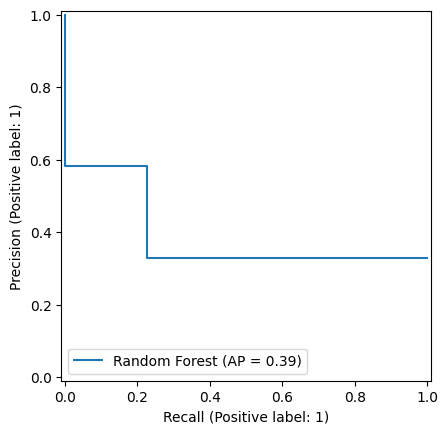

In [82]:
PrecisionRecallDisplay.from_predictions(y2_val, y3_predict, name ='Random Forest');

In [84]:
print(f' El score promedio de precision vs recall es {average_precision_score(y2_val,y3_predict)} ')

 El score promedio de precision vs recall es 0.38703957904369707 


4 - Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

In [92]:
print(f'========= Metricas del TREE DECISSION MODEL =========\n{classification_report(y2_val, y2_predict)}=====================================================\n\n========= Metricas del RANDOM FOREST MODEL =========\n{classification_report(y2_val, y3_predict)}=====================================================')

========= Metricas del TREE DECISSION MODEL =========
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

========= Metricas del RANDOM FOREST MODEL =========
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        63
           1       0.58      0.23      0.33        31

    accuracy                           0.69        94
   macro avg       0.65      0.57      0.56        94
weighted avg       0.67      0.69      0.64        94


#### Analisis chat GPT

##### 📊 Comparación de modelos: Árbol de Decisión vs. Bosque Aleatorio (Random Forest)


🔍 Métricas analizadas:

| Métrica     | Descripción                                                                 |
|-------------|------------------------------------------------------------------------------|
| **Precision** | De las predicciones positivas, ¿cuántas eran realmente positivas?           |
| **Recall**    | De todos los casos positivos reales, ¿cuántos fueron detectados por el modelo? |
| **F1-score**  | Promedio armónico entre precisión y recall. Equilibra ambos.                |
| **Support**   | Cantidad de ejemplos reales en cada clase del conjunto de prueba.           |

---

🌲 Modelo: Árbol de Decisión

| Clase | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.84      | 0.83   | 0.83     | 63      |
| 1     | 0.66      | 0.68   | 0.67     | 31      |
| **Accuracy** |        |        | **0.78** | 94      |

- Buen equilibrio entre **precisión** y **recall** en ambas clases.
- Alto rendimiento en la clase positiva (1), lo cual es crítico en muchos escenarios.
- **Macro avg = 0.75** → promedio simple entre clases.
- **Weighted avg = 0.78** → promedio ponderado por cantidad de casos.

---

🌳 Modelo: Random Forest

| Clase | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.71      | 0.92   | 0.80     | 63      |
| 1     | 0.58      | 0.23   | 0.33     | 31      |
| **Accuracy** |        |        | **0.69** | 94      |

- Excelente recall en clase 0, pero **muy bajo recall en clase 1** (solo 23%).
- F1-score bajo para la clase 1 (0.33), indicando mal balance.
- **Macro avg = 0.60**, significativamente más bajo que el árbol de decisión.

---

✅ Conclusión

El modelo **Árbol de Decisión** presenta un rendimiento superior:

- Mejor **balance entre clases**.
- Mayor **precisión, recall y F1-score** en la clase positiva (1).
- Mejor **accuracy global (0.78 vs 0.70)**.
- Mejores promedios generales (**macro y weighted avg**).

🔎 Si la clase 1 representa un caso importante (como detectar churn, fraudes, etc.), el **Árbol de Decisión es claramente preferible en este escenario.**

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [96]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, cross_validate

In [97]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(modelo, X, y, cv=kf)
cv

{'fit_time': array([1.2457757 , 0.49893022, 0.64819884, 0.43555617, 0.44487643]),
 'score_time': array([0.00832129, 0.00965118, 0.00527549, 0.01165676, 0.01232338]),
 'test_score': array([0.91311922, 0.90788328, 0.90744774, 0.91332753, 0.89928136])}

In [98]:
cv['test_score']

array([0.91311922, 0.90788328, 0.90744774, 0.91332753, 0.89928136])

In [100]:
promedio = cv['test_score'].mean()
desvio_std = cv['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std}, {min (promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.9082118223167223
El desvío típico es de: 0.005112687919502147
El intervalo de confianza es: [0.897986446477718, 0.9184371981557266]


### Validación cruzada con sensibilidad

In [143]:
def intervalo_de_confianza(resultados):
    promedio = resultados.mean()
    desvio_std = resultados.std()
    return f'El intervalo de confianza es: [{promedio-2*desvio_std}, {min (promedio+2*desvio_std,1)}]'

In [144]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(modelo, X, y, cv=kf, scoring='recall')
cv

{'fit_time': array([0.23582053, 0.24010062, 0.31323934, 0.30400348, 0.33602953]),
 'score_time': array([0.00893092, 0.01041055, 0.00775504, 0.00776029, 0.00780034]),
 'test_score': array([0.02509908, 0.02227723, 0.0196802 , 0.0156658 , 0.02196532])}

In [145]:
intervalo_de_confianza(cv['test_score'])

'El intervalo de confianza es: [0.014642022216902556, 0.02723302341737298]'

### Estratificando los datos

In [146]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(modelo, X, y, cv=skf, scoring='recall')

In [147]:
intervalo_de_confianza(cv['test_score'])

'El intervalo de confianza es: [0.019088518825490168, 0.03578864531783442]'

### Ejercicio

1 - En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar. Ejemplo de retorno de la función:

Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]

In [148]:
def intervalo_de_confianza(resultados, nombre_modelo):
    promedio = resultados.mean()
    desvio_std = resultados.std()
    return f'El intervalo de confianza del modelo "{nombre_modelo}" es: [{promedio-2*desvio_std}, {min (promedio+2*desvio_std,1)}]'

2 - KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle. Usa el método cross_val_score que no retorna el tiempo de ejecución, solo las métricas.

In [149]:
modelo_dt = DecisionTreeClassifier(max_depth = 3)
kf2 = KFold(n_splits=10, shuffle=True, random_state=5)
cv2 = cross_val_score(modelo_dt, X2, y2, cv=kf2, scoring='recall')
print (intervalo_de_confianza(cv2, 'Decision Tree'))

modelo_rf = RandomForestClassifier(max_depth = 2)
kf3 = KFold(n_splits=10, shuffle=True, random_state=5)
cv3 = cross_val_score(modelo_rf, X2, y2, cv=kf3, scoring='recall')
print (intervalo_de_confianza(cv3, 'Random Forest'))

El intervalo de confianza del modelo "Decision Tree" es: [0.24650294120233524, 0.76371073401134]
El intervalo de confianza del modelo "Random Forest" es: [0.020702851171630204, 0.46120801573923664]


3 - En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica F1-Score usando el parámetro scoring.

In [150]:
modelo_dt = DecisionTreeClassifier(max_depth = 3)
skf2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
cv2 = cross_val_score(modelo_dt, X2, y2, cv=skf2, scoring='f1')
print (intervalo_de_confianza(cv2, 'Decision Tree'))

modelo_rf = RandomForestClassifier(max_depth = 2)
skf3 = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
cv3 = cross_val_score(modelo_rf, X2, y2, cv=skf3, scoring='f1')
print (intervalo_de_confianza(cv3, 'Random Forest'))

El intervalo de confianza del modelo "Decision Tree" es: [0.2681981750463088, 0.7354166140441551]
El intervalo de confianza del modelo "Random Forest" es: [0.04516476569968386, 0.6716330258807164]


4 - En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (cross_val_score) con el método LeaveOneOut.

In [151]:
# Redefiniendo las variables para poder ejecutar LeavOneOut

X_pequeño = X.sample(n=100, random_state=42)
y_pequeño = y.loc[X_pequeño.index]


In [152]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

modelo2 = DecisionTreeClassifier(max_depth=3)
loo = LeaveOneOut()

resultados = cross_val_score(modelo_dt, X_pequeño, y_pequeño, cv=loo, scoring='accuracy')
print(f"Tasa de acierto con Leave-One-Out (100 muestras): {resultados.mean():.4f}")

Tasa de acierto con Leave-One-Out (100 muestras): 0.8800


## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [153]:
from imblearn.over_sampling import SMOTE

In [154]:
oversampling = SMOTE()

In [155]:
x_balanceada, y_balnanceada = oversampling.fit_resample(X, y)

In [156]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(modelo, x_balanceada, y_balnanceada, cv=skf, scoring='recall')

In [157]:
intervalo_de_confianza(cv['test_score'], "Modelo Balanceado")

'El intervalo de confianza del modelo "Modelo Balanceado" es: [0.6989697737120111, 0.7799852634291187]'

### Pipeline para validación

In [158]:
from imblearn.pipeline import Pipeline as imbPipeline

In [159]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('oversampling', SMOTE()), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [160]:
intervalo_de_confianza(cv['test_score'], "Modelo oversampled con Pipeline")

'El intervalo de confianza del modelo "Modelo con Pipeline" es: [0.20992613285620632, 0.2984321848327175]'

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [161]:
from imblearn.under_sampling import NearMiss

In [162]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('undersample', NearMiss(version = 3)), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [163]:
intervalo_de_confianza(cv['test_score'], "Modelo undersampled con Pipeline")

'El intervalo de confianza del modelo "Modelo undersampled con Pipeline" es: [0.6296140137750224, 0.6983830970683436]'

### Probando el modelo

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



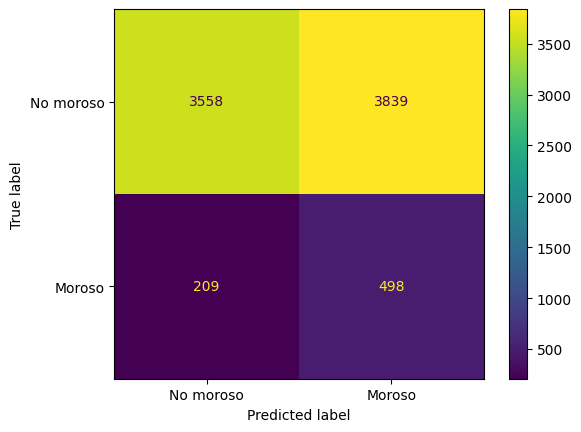

In [177]:
undersample = NearMiss (version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada, y_balanceada)

y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions (y_test,y_previsto, display_labels=['No moroso', 'Moroso']);

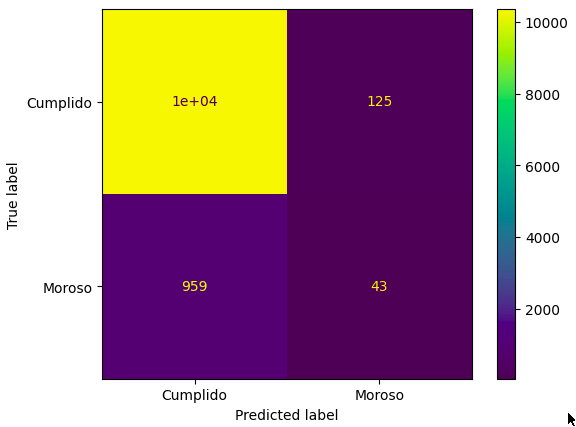

In [170]:
from imblearn.combine import SMOTEENN



              precision    recall  f1-score   support

           0       0.92      0.78      0.85      7397
           1       0.12      0.32      0.18       707

    accuracy                           0.74      8104
   macro avg       0.52      0.55      0.51      8104
weighted avg       0.85      0.74      0.79      8104



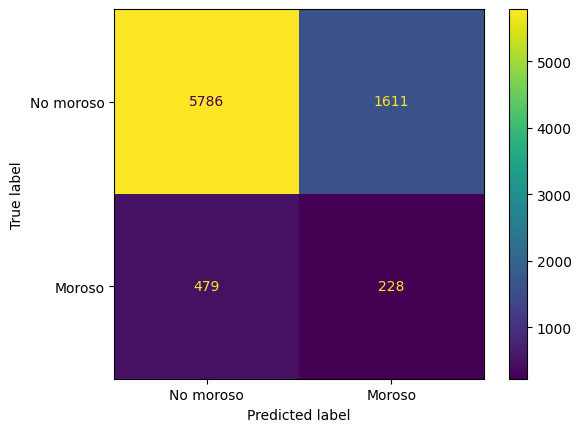

In [171]:
combination = SMOTEENN(sampling_strategy='minority')
X_resampled, y_resampled = combination.fit_resample(X, y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_resampled, y_resampled)

y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions (y_test,y_previsto, display_labels=['No moroso', 'Moroso']);

### Ejercicio

1 - El desbalanceo de los datos de la variable objetivo puede hacer que el modelo se incline a acertar los patrones de solo la categoría que tiene mayor cantidad, haciendo necesario en algunos casos un tratamiento específico de balanceo de datos. La etapa inicial es identificar si existe o no el desbalanceo de datos en la variable objetivo. Por eso, verifica la proporción de datos de la variable objetivo del conjunto de datos de diabetes. Este análisis puede hacerse a partir del porcentaje de datos, utilizando el método value_counts(normalize=True) o con la utilización de un gráfico de conteo, usando el gráfico countplot de la biblioteca seaborn para entender si hay un desbalanceo de datos.

In [172]:
dataset.diabetes.value_counts(normalize=True)

,proportion
diabetes,
0,0.670051
1,0.329949


2 - Al realizar el balanceo de datos en una validación cruzada, es necesario utilizar un pipeline, para que los datos de validación no sean balanceados, manteniéndose en el estándar de los datos del mundo real. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el oversampling con SMOTE, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

In [173]:
modelo_dt = DecisionTreeClassifier(max_depth = 10)
pipeline2 = imbPipeline([('oversampling', SMOTE()), ('arbol', modelo_dt)])
skf2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(pipeline2, X2, y2, cv=skf2, scoring='f1')

In [174]:
intervalo_de_confianza(cv['test_score'], "Modelo_dt oversampled con Pipeline")

'El intervalo de confianza del modelo "Modelo_dt oversampled con Pipeline" es: [0.3642626346941338, 0.5117243258950299]'

3 - Además del oversampling, es posible utilizar la estrategia de undersampling para hacer el balanceo de los datos. A pesar de ser estrategias distintas, ambas requieren de un pipeline por tratarse de balanceo de datos en una validación cruzada. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el undersampling con NearMiss en su versión 3, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

In [175]:
modelo_dt = DecisionTreeClassifier(max_depth = 10)
pipeline2 = imbPipeline([('undersample', NearMiss(version = 3)), ('arbol', modelo_dt)])
skf2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv = cross_validate(pipeline2, X2, y2, cv=skf2, scoring='recall')

In [176]:
intervalo_de_confianza(cv['test_score'], "Modelo undersampled con Pipeline")

'El intervalo de confianza del modelo "Modelo undersampled con Pipeline" es: [0.41650111111659815, 0.6414988888834019]'

4 - Después de realizar diversas análisis y mejorar el rendimiento de los modelos, llega la etapa final, que consiste en seleccionar el modelo con mejor rendimiento y hacer la evaluación final en un conjunto de datos de prueba, que no ha sido visto durante el proceso de entrenamiento y validación. Elige el modelo que obtuvo el mejor rendimiento al comparar las estrategias de oversampling y undersampling y entrena un modelo usando todos los datos con la mejor estrategia. Realiza la evaluación del modelo usando los datos de prueba que fueron separados al inicio de los desafíos, obteniendo el informe de métricas y matriz de confusión.

              precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.27      0.43      0.33         7

    accuracy                           0.40        20
   macro avg       0.41      0.41      0.39        20
weighted avg       0.46      0.40      0.41        20



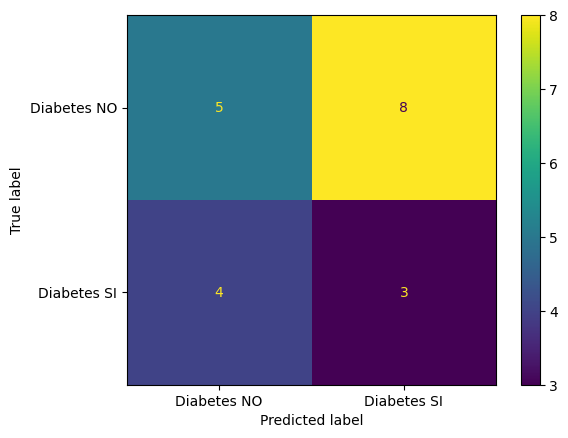

In [178]:
undersample = NearMiss (version = 3)
x_balanced, y_balanced = undersample.fit_resample(X2,y2)

modelo_dt = DecisionTreeClassifier(max_depth=10)
modelo_dt.fit(x_balanced, y_balanced)

y2_previsto = modelo_dt.predict(X2_test)

print(classification_report(y2_test,y2_previsto))
ConfusionMatrixDisplay.from_predictions (y2_test,y2_previsto, display_labels=['Diabetes NO', 'Diabetes SI']);